In [1]:
getwd()

[1] "C:/Users/jmarks/Desktop/GitHub/jaamarks_notebooks/Heroin_Project/develop"

png 
  2

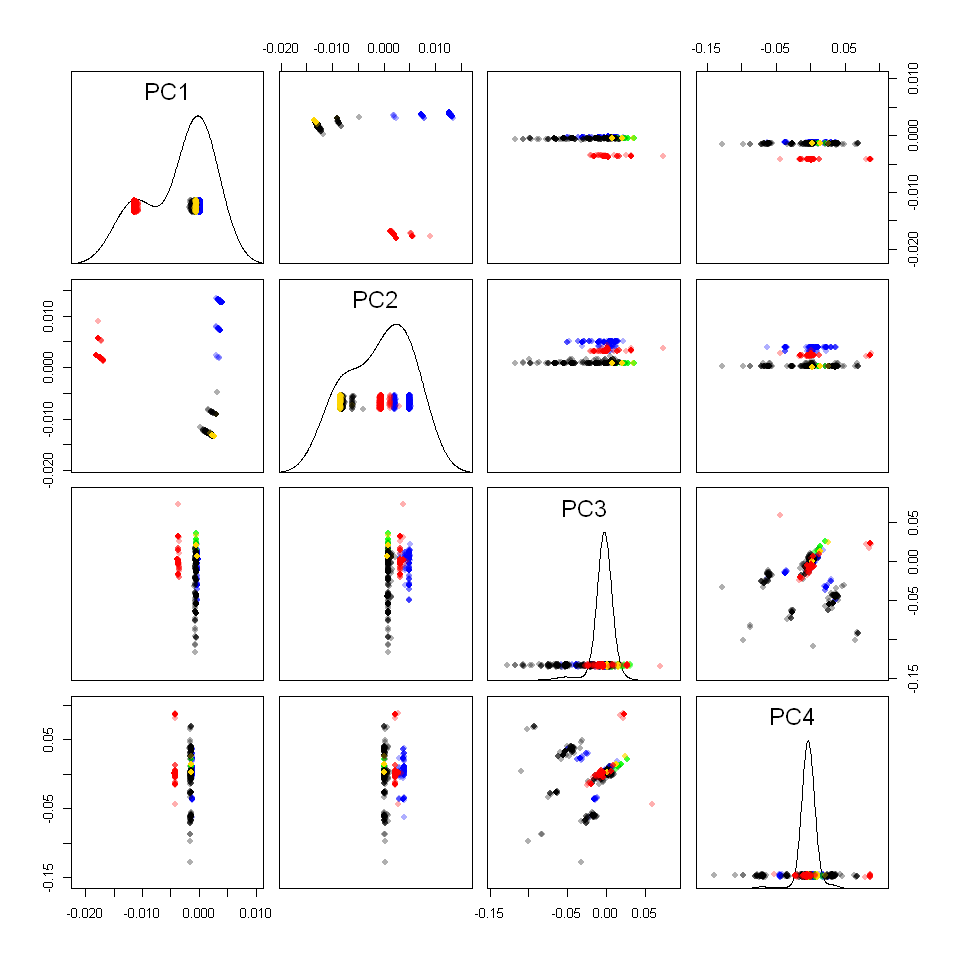

In [10]:
# Load PCA data
options(stringsAsFactors=F)
lung.lymphoma <- read.table("C:/Users/jmarks/Desktop/Test/study_and_1000g_28_snp.pca.evec", comment.char="#", sep="", row.names=1)

# Function for plotting off-diagonal scatterplots
plot.offdiag <- function(x, y, colors=label.colors){
    #Make x and y axes equal
    limits <- c(min(x,y), max(x,y)) * 1.3
    par(usr = c(limits, limits))
    points(x,y, col=colors, pch=16)
}

# Function for plotting diagonal density plots
plot.diag <- function(x, colors=label.colors){
    d <- density(x, bw=0.01, kernel="gaussian")
    #Update plot axes limits
    par(usr = c(range(d$x), range(d$y)*1.3))
    points(d$x,d$y, type="l")
    #Add PC values
    points(x=x, y=jitter(rep(mean(d$y),times=d$n),factor=5), col=label.colors, pch=16)
}

#Run PCA and get % variance
dspace <- lung.lymphoma[1:10] #transformed dataspace

AFR = scan(file="C:/Users/jmarks/Desktop/Test/AFR_1000g_subject_IDs", what=character())
EAS = scan(file="C:/Users/jmarks/Desktop/Test/EAS_1000g_subject_IDs", what=character())
EUR = scan(file="C:/Users/jmarks/Desktop/Test/EUR_1000g_subject_IDs", what=character())

#Color label samples
sample.names <- row.names(lung.lymphoma)
label.colors <- rep(NA, length(sample.names))
label.colors[grepl(x=sample.names, pattern="LLP|Mayo|MDA|Wayne", ignore.case=F)] <- rgb(0,0,255,80, maxColorValue=255) #blue
label.colors[grepl(x=sample.names, pattern="TGS", ignore.case=F)] <- rgb(255,0,0,80, maxColorValue=255) #red
label.colors[grepl(x=sample.names, pattern=paste(AFR,collapse="|"), ignore.case=F)] <- rgb(0,0, 0,80, maxColorValue=255) #black
label.colors[grepl(x=sample.names, pattern=paste(EAS,collapse="|"), ignore.case=F)] <- rgb(0,255,0,80, maxColorValue=255) #green
label.colors[grepl(x=sample.names, pattern=paste(EUR,collapse="|"), ignore.case=F)] <- rgb(255,215,0,80, maxColorValue=255) #gold
legend.cols <- c(rgb(0,0,255,255, maxColorValue=255), rgb(255,0,0,255, maxColorValue=255),
                 rgb(0,0,0,255, maxColorValue=255), rgb(0,255,0,255, maxColorValue=255),
                 rgb(255,215,0,255, maxColorValue=255))
#legend.cols <- c(rgb(0,0,255,255, maxColorValue=255),rgb(255,0,0,255, maxColorValue=255))

options(repr.plot.width=8, repr.plot.height=8)
#Redefine outer margin
par(oma = c(4, 1, 2, 1))
pairs(x=dspace[,1:4], panel=plot.offdiag, diag.panel=plot.diag, 
      labels=paste0("PC",1:4), label.pos=0.9, cex.labels=1.8)
par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), mar=c(0, 0, 1.5, 0), new=TRUE)
jpeg("../../../../Test/c2.jpg")
plot(0, 0, type = "n", bty = "n", xaxt = "n", yaxt = "n", main="Lung Cancer vs Lymphoma vs 1000G", cex.main=1)
legend("bottom", c("Lung Cancer", "Lymphoma", "AFR", "EAS", "EUR"), 
       pch=19, col=legend.cols,
       xpd=TRUE, horiz=TRUE, inset=c(0,-0.02), 
       bty="n", cex=1)
dev.off()
#legend("bottom", c("Lung Cancer", "Lymphoma"), 
#       pch=19, col=legend.cols,
#       xpd=TRUE, horiz=TRUE, inset=c(0,-0.02), 
#       bty="n", cex=1)


NULL